In [1]:
# Import libs

# Libs for modeling
import numpy as np
import pandas as pd

# Libs for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Lib to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read data
data = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

data.shape

(6454, 5)

In [5]:
# Head

data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

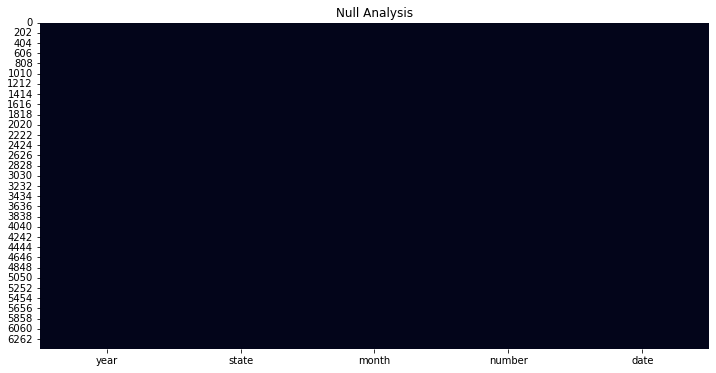

In [7]:
plt.figure( figsize=(12,6))
plt.title('Null Analysis')
sns.heatmap( data.isnull(), cbar=False );

In [8]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [11]:
data.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

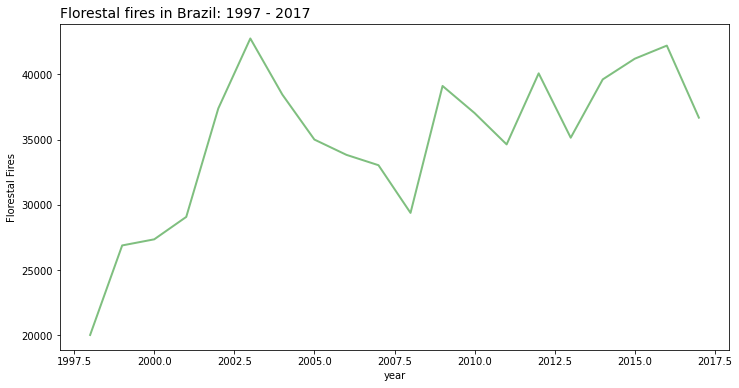

In [19]:
# yearly analysis

analysis = data.groupby( by=['year']).sum().reset_index()

plt.figure( figsize=(12,6))
sns.lineplot( data = analysis, x ='year', y='number', estimator='sum', lw=2, color='green', alpha=0.5)

plt.title('Florestal fires in Brazil: 1997 - 2017', loc='left', fontsize=14)
plt.ylabel('Florestal Fires');

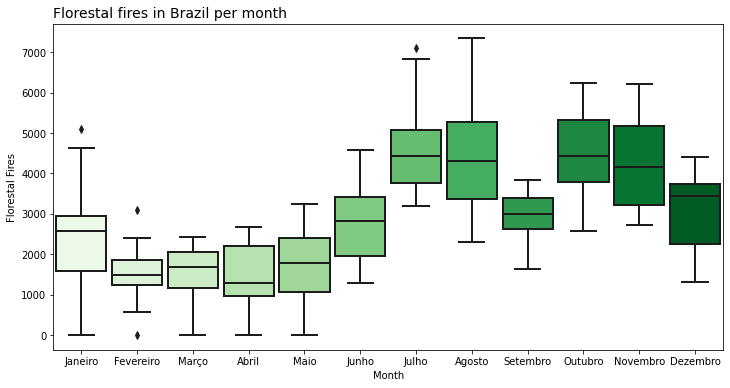

In [24]:
# monthly analysis

analysis_02 = data.groupby( by=['year','month']).sum().reset_index()

plt.figure( figsize=(12,6))
sns.boxplot( data = analysis_02 , x ='month', y='number', palette='Greens', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

plt.title('Florestal fires in Brazil per month', loc='left', fontsize=14)
plt.ylabel('Florestal Fires');
plt.xlabel('Month');

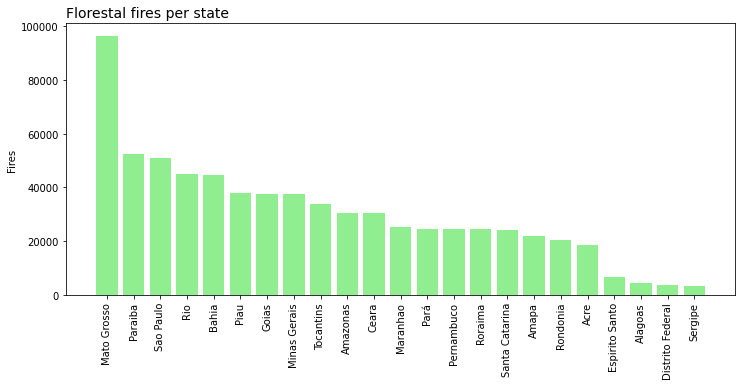

In [25]:
# yearly analysis
analisys_03 = data.groupby( by=['state'] ).sum().reset_index()[['state', 'number']].sort_values( 'number', ascending=False )

plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'Florestal fires per state', loc='left', fontsize=14 )

# Grafico
plt.bar( analisys_03.state, analisys_03['number'], color='lightgreen' )

# Labels
plt.ylabel('Fires')
plt.xticks( rotation=90 );

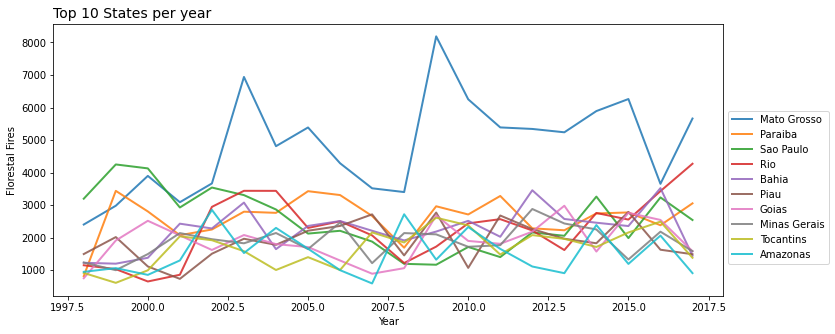

In [27]:
# TOP 10 Brazil States
analisys_04 = analisys_03['state'][0:10].values

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'Top 10 States per year', loc='left', fontsize=14 )

# Loop
for Coluna in analisys_04:
  
  # Filtrar o estado
  filter = data.loc[ data['state'] == Coluna ]

  # Agrupar os valores para sumarizar
  local_analysis = filter.groupby( by=['year'] ).sum().reset_index()

  # Plot
  sns.lineplot(data=local_analysis, x='year', y='number', lw=2, alpha=0.85)

# Labels
plt.xlabel('Year')
plt.ylabel('Florestal Fires')

# Legenda
plt.legend( analisys_04, bbox_to_anchor=(1, 0.7) );

In [30]:
# Plot Geográfico

# List of states
states = analisys_03.sort_values('state')['state'].values

# List of values
values = analisys_03.sort_values('state')['number'].values

# Latitude
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitude
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Ordering the data
dictionary = {
    'States' : states,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Florestal Fires' : values
}

# Reading the dictionary
geo_analysis = pd.DataFrame ( dictionary )

geo_analysis.head()

,States,Latitude,Longitude,Florestal Fires
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [31]:
# import lib
import plotly.express as px

# Geo heat map
px.density_mapbox(
    geo_analysis,
    lat='Latitude',
    lon='Longitude',
    z='Florestal Fires',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)